In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D
import tensorflow.keras.utils 
from tensorflow.keras.utils import to_categorical
from keras import utils as np_utils
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from keras.utils import np_utils
import seaborn as sn
import matplotlib.pyplot as plt
from keras import backend as K

In [ ]:
import visualkeras

In [ ]:
## Important functions 

## -------------------------------------------------------------------- ##

def F1_Score(y_true, y_pred): 
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  recall = true_positives / (possible_positives + K.epsilon())
  f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
  return f1_val

## -------------------------------------------------------------------- ##
def preprocessing(raw, num_classes, im_rows, im_columns):
  out_y = tensorflow.keras.utils.to_categorical(raw.label, num_classes)
  num_images = raw.shape[0]
  x_as_array = raw.values[:,1:]
  x_reshaped = x_as_array.reshape(num_images, im_rows, im_columns, 1)
  normalized_x = x_reshaped / 255

  return normalized_x, out_y

In [ ]:
train_file = '/content/drive/MyDrive/Neural Networks & Deep Learning/FashionMNIST/fashion-mnist_train.csv'
test_file = '/content/drive/MyDrive/Neural Networks & Deep Learning/FashionMNIST/fashion-mnist_test.csv'

In [ ]:
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [ ]:
train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
num_classes = 10
im_rows = 28
im_columns = 28

In [ ]:
x_train, y_train = preprocessing(train_data, 10, 28, 28)

In [ ]:
def MakeModel():
  model = Sequential()
  model.add( Conv2D(filters= 16, kernel_size=(4,4), padding='Same',activation='relu', input_shape=(28,28,1)) )
  model.add(BatchNormalization())
  
  model.add( Conv2D(filters= 16, kernel_size=(3,3), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  
  model.add( MaxPool2D(pool_size=(2,2)) )
  model.add(Dropout(0.4))

  model.add( Conv2D(filters=32, kernel_size=(3,3), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( Conv2D(filters=64, kernel_size=(2,2), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( MaxPool2D(pool_size=(2,2)) )
  model.add(Dropout(0.4))
  
  model.add( Conv2D(filters=128, kernel_size=(3,3), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( Conv2D(filters=256, kernel_size=(2,2), padding='Same',activation='relu') )
  model.add(BatchNormalization())
  model.add( MaxPool2D(pool_size=(2,2)) )
  model.add(Dropout(0.4))
  
  model.add(Flatten())
  
  model.add(Dense(256,activation='relu'))
  model.add(BatchNormalization())
  model.add(Dense(num_classes,activation='softmax'))
  
  model.summary()
  return model

In [ ]:
model = MakeModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        272       
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 28, 28, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 16)        2320      
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 28, 28, 16)        64        
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 14, 14, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4

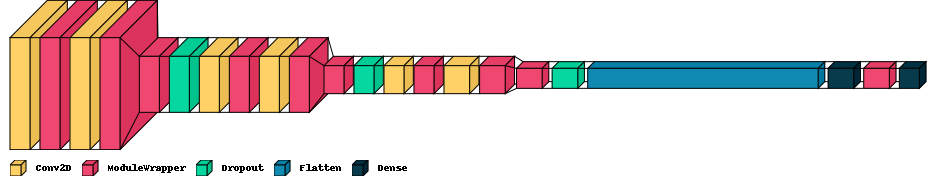

In [ ]:
visualkeras.layered_view(model, to_file='output.png', legend = True)

In [ ]:
import keras_sequential_ascii
from keras_sequential_ascii import keras2ascii
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####     28   28    1
              Conv2D    \|/  -------------------       272     0.0%
                relu   #####     28   28   16
       ModuleWrapper   ????? -------------------        64     0.0%
                       #####     28   28   16
              Conv2D    \|/  -------------------      2320     0.3%
                relu   #####     28   28   16
       ModuleWrapper   ????? -------------------        64     0.0%
                       #####     28   28   16
       ModuleWrapper   ????? -------------------         0     0.0%
                       #####     14   14   16
             Dropout    | || -------------------         0     0.0%
                       #####     14   14   16
              Conv2D    \|/  -------------------      4640     0.6%
                relu   #####     14   14   32
       ModuleWrapper   ????? -------------------       128     0.0%
              

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy',F1_Score])

In [ ]:
history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_split=0.25)

Epoch 1/50
704/704 [==============================] - 26s 10ms/step - loss: 0.5801 - accuracy: 0.7890 - F1_Score: 0.7871 - val_loss: 0.4718 - val_accuracy: 0.8302 - val_F1_Score: 0.8307
Epoch 2/50
704/704 [==============================] - 7s 9ms/step - loss: 0.3768 - accuracy: 0.8603 - F1_Score: 0.8603 - val_loss: 0.3262 - val_accuracy: 0.8782 - val_F1_Score: 0.8792
Epoch 3/50
704/704 [==============================] - 6s 9ms/step - loss: 0.3242 - accuracy: 0.8787 - F1_Score: 0.8798 - val_loss: 0.3026 - val_accuracy: 0.8905 - val_F1_Score: 0.8918
Epoch 4/50
704/704 [==============================] - 6s 9ms/step - loss: 0.2945 - accuracy: 0.8888 - F1_Score: 0.8900 - val_loss: 0.3253 - val_accuracy: 0.8807 - val_F1_Score: 0.8818
Epoch 5/50
704/704 [==============================] - 7s 9ms/step - loss: 0.2761 - accuracy: 0.8982 - F1_Score: 0.8973 - val_loss: 0.2619 - val_accuracy: 0.9023 - val_F1_Score: 0.9042
Epoch 6/50
704/704 [==============================] - 7s 9ms/step - loss: 0.26

In [ ]:
model.save('/content/drive/MyDrive/Neural Networks & Deep Learning/FashionMNIST/"mod1_0.h5"')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Neural Networks & Deep Learning/FashionMNIST/"mod1_0.h5"/assets


<Figure size 400x240 with 0 Axes>

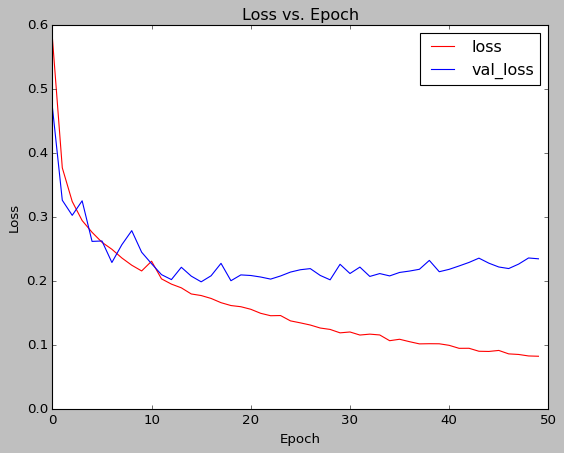

<Figure size 400x240 with 0 Axes>

In [ ]:
plt.style.use('classic')
plt.plot(history.history['loss'],'red')
plt.plot(history.history['val_loss'],'blue')
plt.title('Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'])
plt.figure(figsize=(5,3)) 

<Figure size 400x240 with 0 Axes>

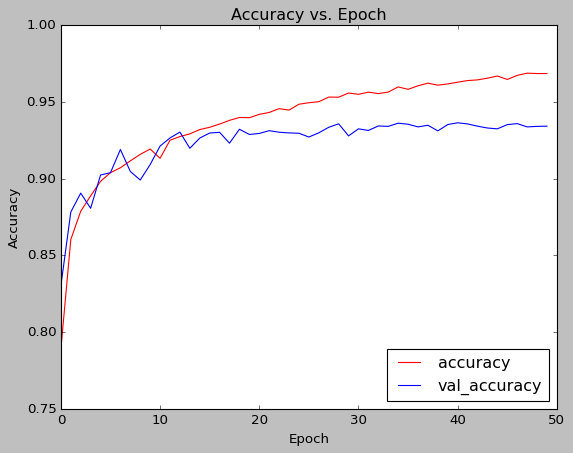

<Figure size 400x240 with 0 Axes>

In [ ]:
plt.style.use('classic')
plt.plot(history.history['accuracy'],'red')
plt.plot(history.history['val_accuracy'],'blue')
plt.title('Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')

plt.figure(figsize=(5,3)) 

<Figure size 400x240 with 0 Axes>

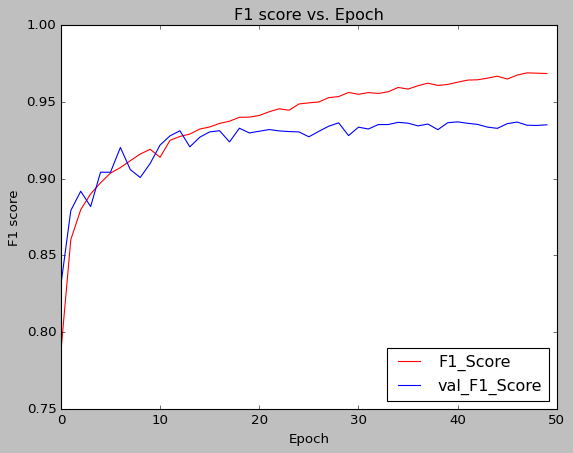

<Figure size 400x240 with 0 Axes>

In [ ]:
plt.style.use('classic')
plt.plot(history.history['F1_Score'],'red')
plt.plot(history.history['val_F1_Score'],'blue')
plt.title('F1 score vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('F1 score')
plt.legend(['F1_Score', 'val_F1_Score'], loc = 'lower right')
plt.figure(figsize=(5,3)) 

In [ ]:
x_test, y_test = preprocessing(test_data, 10, 28, 28)

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2256508618593216
Test accuracy: 0.9376000165939331


In [ ]:
#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)
#get the indices to be plotted
y_true = np.array(test_data.iloc[:, 0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:454: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
accurate_pred = np.nonzero(predicted_classes == y_true)[0]
non_accurate_pred = np.nonzero(predicted_classes != y_true)[0]

In [ ]:
print(classification_report(predicted_classes, y_true))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1025
           1       0.99      0.99      0.99      1005
           2       0.86      0.95      0.90       911
           3       0.94      0.96      0.95       977
           4       0.93      0.89      0.91      1047
           5       0.98      1.00      0.99       986
           6       0.83      0.79      0.81      1044
           7       0.97      0.97      0.97      1000
           8       0.99      0.99      0.99       991
           9       0.98      0.97      0.98      1014

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
labels = {0 : "T-shirt/top", 
          1: "Trouser", 
          2: "Pullover", 
          3: "Dress", 
          4: "Coat",
          5: "Sandal", 
          6: "Shirt", 
          7: "Sneaker", 
          8: "Bag", 
          9: "Ankle Boot"}
target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(num_classes)]

In [ ]:
cf = confusion_matrix(np.array(y_true), predicted_classes)
print(cf)

[[900   4  12   9   2   0  72   0   1   0]
 [  0 994   3   0   0   0   2   0   1   0]
 [ 17   0 861  10  51   0  61   0   0   0]
 [ 13   5   2 937  26   0  17   0   0   0]
 [  0   0  10   4 931   0  55   0   0   0]
 [  0   0   0   0   0 982   1   9   1   7]
 [ 93   1  22  17  36   0 829   0   2   0]
 [  0   0   0   0   0   2   0 974   0  24]
 [  2   1   1   0   1   1   7   0 986   1]
 [  0   0   0   0   0   1   0  17   0 982]]


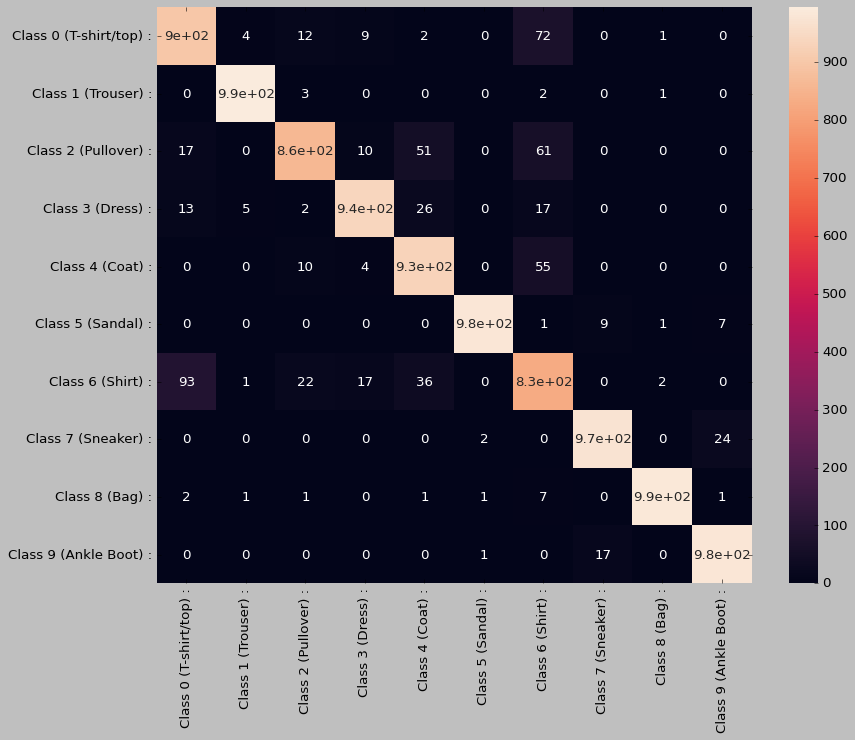

In [ ]:
df_cm = pd.DataFrame(cf, index = [i for i in target_names],
                  columns = [i for i in target_names])
plt.figure(figsize = (12,9))
sn.heatmap(df_cm, annot=True)